In [1]:
# adopted from https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [2]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('cluster_konsumen.csv')
data.head()

,pendapatan_tahunan,bidang_usaha,usia_perusahaan,jumlah_karyawan
0,1000000,transportasi,10,200
1,0,pemerintahan,40,1000
2,200000,perdagangan,2,50
3,500000,perdagangan,5,100
4,75000,transportasi,3,150


In [4]:
categorical_features = ['bidang_usaha']
continuous_features = ['pendapatan_tahunan','usia_perusahaan','jumlah_karyawan']

In [5]:
data[continuous_features].describe()

,pendapatan_tahunan,usia_perusahaan,jumlah_karyawan
count,1.700000e+01,17.000000,17.000000
mean,2.804059e+06,9.176471,562.529412
std,7.470403e+06,9.875698,1427.855390
min,0.000000e+00,1.000000,1.000000
25%,2.500000e+04,3.000000,50.000000
50%,7.500000e+04,5.000000,100.000000
75%,5.000000e+05,10.000000,400.000000
max,2.500000e+07,40.000000,6000.000000


In [6]:
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,pendapatan_tahunan,usia_perusahaan,jumlah_karyawan,bidang_usaha_jasa,bidang_usaha_layanan,bidang_usaha_pemerintahan,bidang_usaha_perdagangan,bidang_usaha_produksi,bidang_usaha_transportasi
0,1000000,10,200,0,0,0,0,0,1
1,0,40,1000,0,0,1,0,0,0
2,200000,2,50,0,0,0,1,0,0
3,500000,5,100,0,0,0,1,0,0
4,75000,3,150,0,0,0,0,0,1


In [7]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [8]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

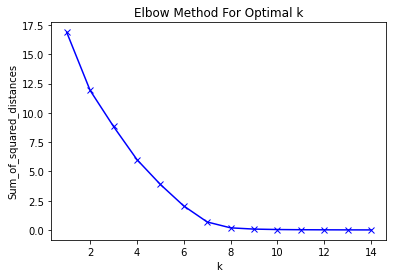

In [9]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
k_means = KMeans(n_clusters=4)
k_means.fit(data)

KMeans(n_clusters=4)